<h1 id="Road Safety Data Analysis"><span style="color: #ff0000;">Road Safety Data Analysis (Department for Transport - United Kingdom)</span></h1>

<h2 style="color: #000000;">Data Collection</h2>

The 2015 data for analysis will be used from https://data.gov.uk/dataset/road-accidents-safety-data.


<h2 style="text-align: left;">Initialize libraries, get data sets, consolidate and cleanse.</h2>

In [1]:
# Importing libraries and the data set
from pandas import Series, DataFrame
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 12, 4  # that's default image size for this interactive session
import scipy
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,  precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()

We will start exploring 2015 dataset.

In [2]:
RoadSafety2015 = pd.read_csv("UKAccidents2015.csv")
RoadSafety2015.shape

d:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(227048, 55)

We observe about 227+K rows and 55 variables in the dataset. 

<h2>Exploratory Data Analysis</h2>
<p>In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with vizual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.</p>
<p>&nbsp;The pupose of this exercise is to visually analyze to answer the following questions:</p>
<p>1. Distribution of departure delays across Months.</p>
<p>2. Analyze departure delay across Hour of departure.</p>
<p>3. Analyze departure delay across Day of Month.</p>
<p>4. Analyze departure delay by Carrier.</p>
<p>We will designate "DEP_DELAY" (scheduled departure delay in minutes). 
For analysis, we may have to create new variable "DEP_DELAY_FLAG" to indicate Delay or No Delay. 

For our analysis, we filter data for  Atlanta (ATL), which was the most busiest Airport in 2014. </p>

In [5]:
RoadSafety2015['ACC_FATAL'] = np.where(RoadSafety2015.Accident_Severity == 1, 1 , 0)
RoadSafety2015['ACC_SEVERE'] = np.where(RoadSafety2015.Accident_Severity == 2, 1 , 0)
RoadSafety2015['ACC_SLIGHT'] = np.where(RoadSafety2015.Accident_Severity == 3, 1 , 0)

In [10]:
RoadSafety2015['ACC_COUNT'] = np.where(RoadSafety2015.Accident_Severity > 0 , 1 , 0)

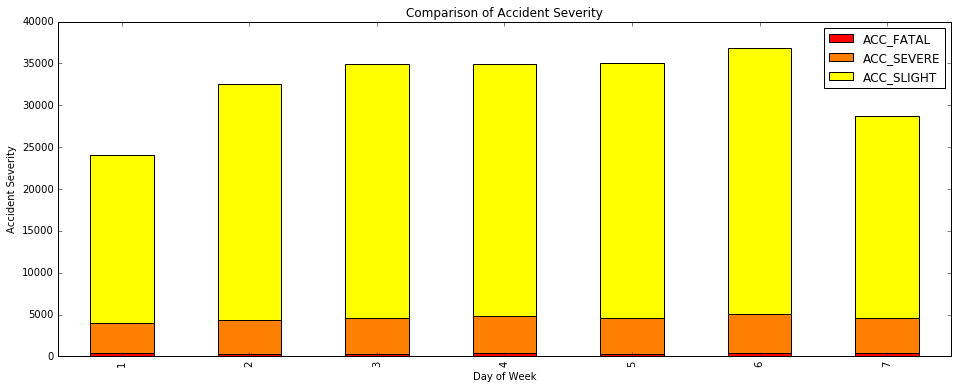

In [7]:
RoadSafety2015.pivot_table(columns='Day_of_Week')
delays_list = ['ACC_FATAL','ACC_SEVERE','ACC_SLIGHT']
RoadSafety2015_by_day = RoadSafety2015.pivot_table(index='Day_of_Week', values=delays_list, aggfunc='sum')
RoadSafety2015_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='autumn') # area plot
plt.xlabel('Day of Week')
plt.ylabel('Accident Severity')
plt.title('Comparison of Accident Severity')

Day of Week
1 - Sunday, 2 - Monday, 3 - Tuesday, 4 - Wednesday, 5 - Thursday, 6 - Friday, 7 - Saturday

Accident Severity
1 - Fatal, 2 - Serious, 3 - Slight

Based on the above chart, we observe that
a. Most accidents are slight injuries and fatal accidents are at the minimum.
b. Friday seems to have more accidents and accidents are progressive starting Sunday.

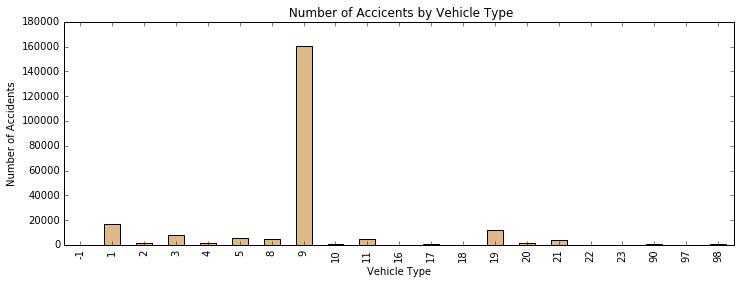

In [12]:
temp1 =  RoadSafety2015[ RoadSafety2015.ACC_COUNT > 0]
temp2 = temp1.groupby('Vehicle_Type').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accicents by Vehicle Type')

1 - Pedal cycle, 3 - Motorcycle 125cc and under, 5 - Motorcycle over 500cc
8 - Taxi/Private hire car, 9 - Car, 19	Van / Goods 3.5 tonnes mgw or under

The highest casue of accidents are Cars and other vehicles are are at the minimum.

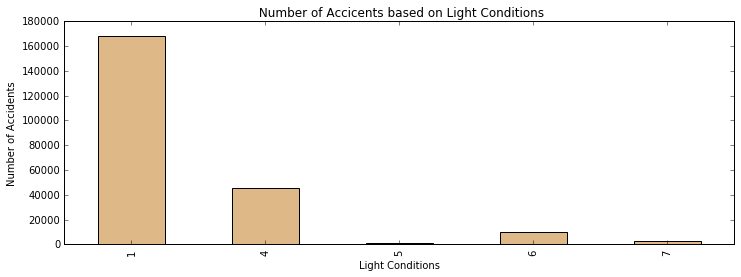

In [31]:
temp1 =  RoadSafety2015[ RoadSafety2015.ACC_COUNT > 0]
temp2 = temp1.groupby('Light_Conditions').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accicents based on Light Conditions')

1	Daylight
4	Darkness - lights lit
5	Darkness - lights unlit
6	Darkness - no lighting
7	Darkness - lighting unknown

More accidents have occurred during the day.

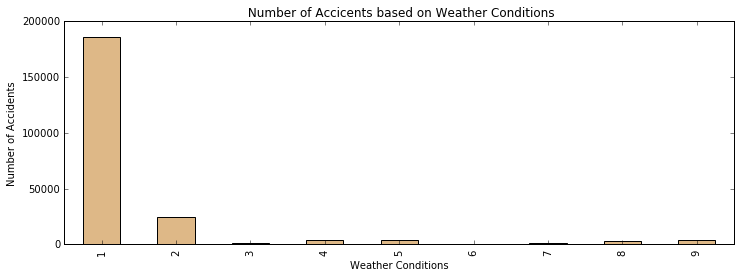

In [14]:
temp1 =  RoadSafety2015[ RoadSafety2015.ACC_COUNT > 0]
temp2 = temp1.groupby('Weather_Conditions').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accicents based on Weather Conditions')

1 - Fine no high winds, 2 - Raining no high winds, 3 - Snowing no high winds, 4 - Fine + high winds
5 - Raining + high winds, 6 - Snowing + high winds, 7 - Fog or mist, 8 - Other, 9 - Unknown

Most accidents have happened under clear weather followed by Rain.

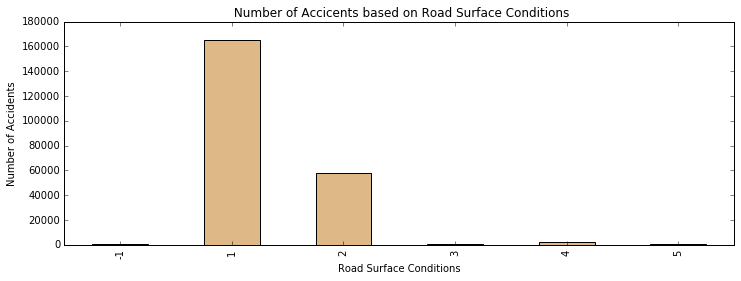

In [32]:
temp1 =  RoadSafety2015[ RoadSafety2015.ACC_COUNT > 0]
temp2 = temp1.groupby('Road_Surface_Conditions').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accicents based on Road Surface Conditions')

In [ ]:
1	Dry
2	Wet or damp
3	Snow
4	Frost or ice
5	Flood over 3cm. deep
6	Oil or diesel
7	Mud

Most accidents have occured during dry conditions.

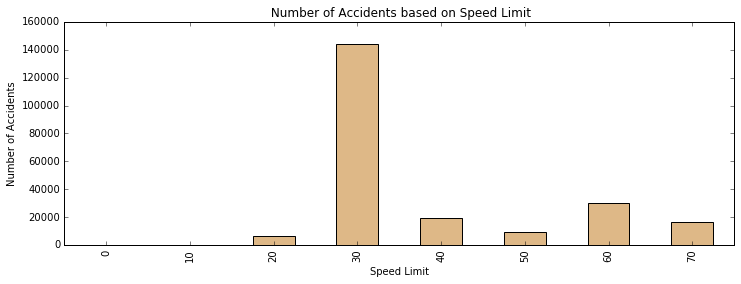

In [25]:
temp1 =  RoadSafety2015[ RoadSafety2015.ACC_COUNT > 0]
temp2 = temp1.groupby('Speed_limit').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents based on Speed Limit')

Most accidents have occured at the 30 speed limit followed by 60 and then 70. 

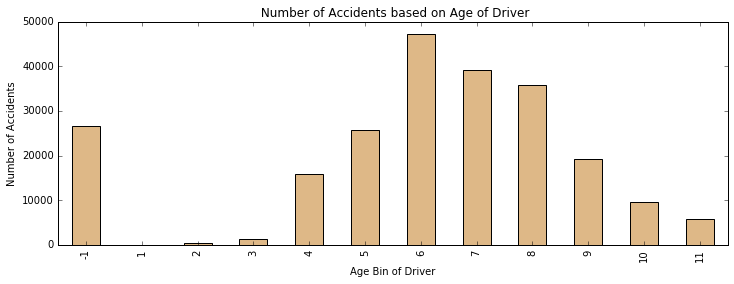

In [28]:
temp1 =  RoadSafety2015[ RoadSafety2015.ACC_COUNT > 0 ]                                                                 
temp2 = temp1.groupby('Age_Band_of_Driver').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Age Bin of Driver')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents based on Age of Driver')

1	0 - 5
2	6 - 10
3	11 - 15
4	16 - 20
5	21 - 25
6	26 - 35
7	36 - 45
8	46 - 55
9	56 - 65
10	66 - 75
11	Over 75

Most of the accidents have been caused by drivers between the age of 26 and 35.


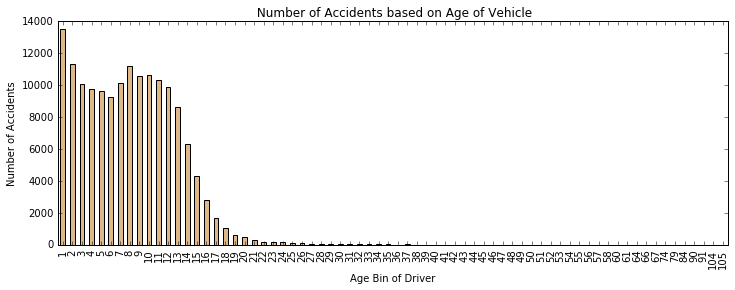

In [30]:
temp1 =  RoadSafety2015[ RoadSafety2015.Age_of_Vehicle > 0 ]                                                                 
temp2 = temp1.groupby('Age_of_Vehicle').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Age Bin of Driver')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents based on Age of Vehicle')

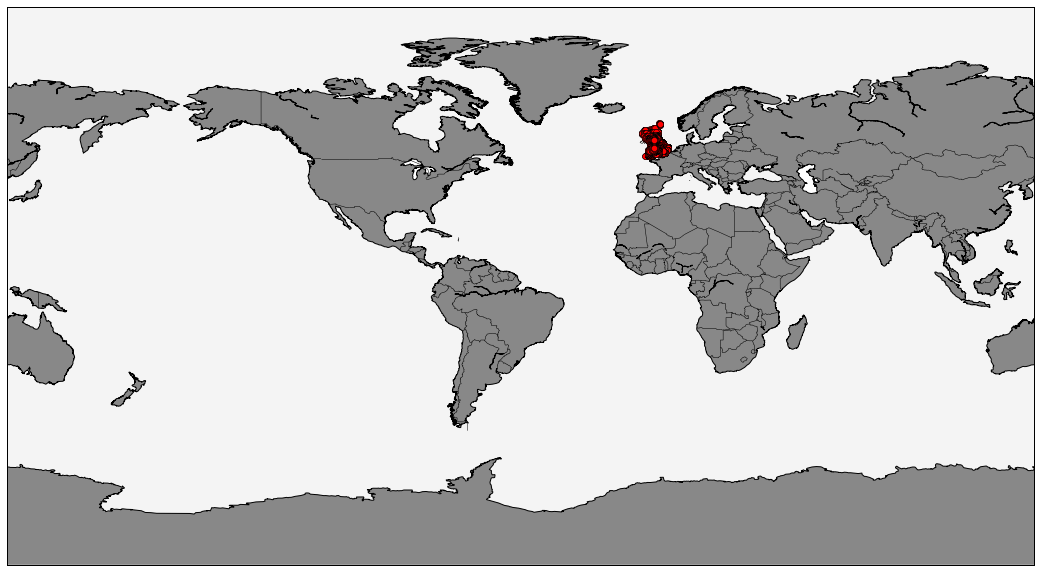

In [39]:
# Import pandas
import pandas as pd

# Import matplotlib and Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline

# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection,  gall
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_1=51.,lat_2=51,lat_0=29,lon_0=-50.)
#              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(RoadSafety2015['Longitude'].values, RoadSafety2015['Latitude'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=6)

# Show the map
plt.show()